In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import keras
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D, Reshape
from keras.models import Sequential
from keras.utils import np_utils

In [3]:
df = pd.read_csv("fer2013.csv")

In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [34]:
df["Usage"].value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [35]:
def process_data(main_df, use):
    subset_df = main_df[main_df["Usage"] == use]
    subset_df.drop(columns=['Usage'], inplace=True)
    subset_df['pixels'] = subset_df['pixels'].apply(lambda pixel_str: np.fromstring(pixel_str, sep=' '))
    x = np.vstack(subset_df['pixels'].values)
    x = x.reshape(-1, 48, 48, 1)
    y = subset_df['emotion'].values
    y = np_utils.to_categorical(y)
    return x, y

In [36]:
x_train, y_train = process_data(df, 'Training')
x_validation, y_validation = process_data(df, 'PublicTest')

/Users/ritvikareddy 1/Documents/GitHub/ml-project/venv/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/ritvikareddy 1/Documents/GitHub/ml-project/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [38]:
x_validation.shape

(3589, 48, 48, 1)

In [33]:
model = Sequential()

model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", 
                 input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))

model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.6))

model.add(Dense(7))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 46, 46, 64)        256       
_________________________________________________________________
activation_3 (Activation)    (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 64)        0         
__________

In [41]:
# save best weights
checkpoint = ModelCheckpoint(filepath='cnn_basic', verbose=1, save_best_only=True)

# num epochs
epochs = 10

# run model
hist = model.fit(x_train, y_train, epochs=epochs,
                 shuffle=True,
                 batch_size=100, validation_data=(x_validation, y_validation),
                 callbacks=[checkpoint], verbose=2)

# save model to json
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
    json_file.write(model_json)

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
 - 567s - loss: 2.0226 - acc: 0.2246 - val_loss: 1.6770 - val_acc: 0.3430

Epoch 00001: val_loss improved from inf to 1.67698, saving model to cnn_basic
Epoch 2/10
 - 567s - loss: 1.6919 - acc: 0.3293 - val_loss: 1.6283 - val_acc: 0.3583

Epoch 00002: val_loss improved from 1.67698 to 1.62832, saving model to cnn_basic
Epoch 3/10
 - 561s - loss: 1.5585 - acc: 0.3901 - val_loss: 1.4848 - val_acc: 0.4271

Epoch 00003: val_loss improved from 1.62832 to 1.48476, saving model to cnn_basic
Epoch 4/10
 - 563s - loss: 1.4786 - acc: 0.4236 - val_loss: 1.4240 - val_acc: 0.4416

Epoch 00004: val_loss improved from 1.48476 to 1.42405, saving model to cnn_basic
Epoch 5/10
 - 560s - loss: 1.4158 - acc: 0.4518 - val_loss: 1.3325 - val_acc: 0.4940

Epoch 00005: val_loss improved from 1.42405 to 1.33246, saving model to cnn_basic
Epoch 6/10
 - 559s - loss: 1.3699 - acc: 0.4739 - val_loss: 1.2799 - val_acc: 0.5082

Epoch 00006: val_loss improve

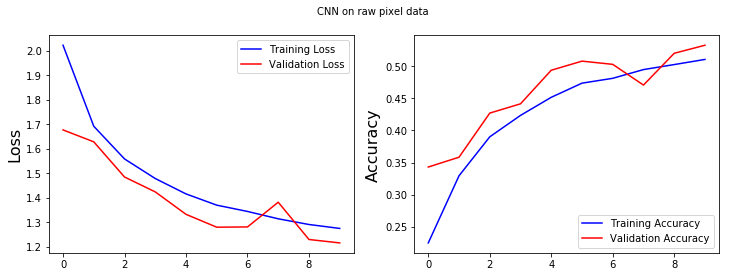

In [47]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.suptitle('CNN on raw pixel data', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color='b', label='Training Loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], color='b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [49]:
x_test, y_test = process_data(df, "PrivateTest")


/Users/ritvikareddy 1/Documents/GitHub/ml-project/venv/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/Users/ritvikareddy 1/Documents/GitHub/ml-project/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [50]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Loss on test data", score[0])
print("Test Accuracy", score[1])

Loss on test data 1.2131059589609192
Test Accuracy 0.5363611033797164
